<a href="https://colab.research.google.com/github/jennysands/Software-Engineering/blob/main/Image_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Get the bird images
!wget https://www.kaggle.com/datasets/gpiosenka/100-bird-species/download?datasetVersionNumber=59

--2022-10-12 12:59:07--  https://www.kaggle.com/datasets/gpiosenka/100-bird-species/download?datasetVersionNumber=59
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fgpiosenka%2F100-bird-species%2Fversions%2F59%3Fresource%3Ddownload [following]
--2022-10-12 12:59:07--  https://www.kaggle.com/account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fgpiosenka%2F100-bird-species%2Fversions%2F59%3Fresource%3Ddownload
Reusing existing connection to www.kaggle.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘download?datasetVersionNumber=59’

download?datasetVer     [ <=>                ]   6.48K  --.-KB/s    i

In [ ]:
#Unzip insect images
!unzip "/content/drive/MyDrive/Image classifier Insects/archive.zip" -d "/content/drive/MyDrive/Image classifier Insects/"

In [ ]:
!unzip "drive/MyDrive/Image classifier/Dataset.zip" -d "drive/MyDrive/Image classifier/test"

In [ ]:
from tables import path
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt


'''Create dataframe for Training data'''
dataframe = {"Animal name": [], "Path": [], "ID": []}
dataframe = pd.DataFrame(dataframe)


p = 0
df = pd.read_csv (r'drive/MyDrive/Image classifier/test/Dataset/birds.csv')
for i in df["filepaths"]:
  if i.startswith("tr"):
    labels = (df["labels"].loc[[p]])
    labels = labels.to_string(index=False, header=False)
    class_ID = (df["class id"].loc[[p]])
    class_ID = class_ID.to_string(index=False, header=False)
    new_row = {"Animal name":labels , "Path":i, "ID":class_ID}
    dataframe = dataframe.append(new_row, ignore_index=True)
    p+=1
    continue
  else:
    break

print(dataframe)
dataframe.to_csv("trainfiles.csv", index=False)

Mounted at /content/drive


KeyboardInterrupt: ignored

In [ ]:
'''Create dataframe for Validation data'''
dataframe = {"Animal name": [], "Path": [], "ID": []}
dataframe = pd.DataFrame(dataframe)


p = 0
df = pd.read_csv (r'drive/MyDrive/Image classifier/test/Dataset/birds.csv')
for i in df["filepaths"]:
  if i.startswith("v"):
    labels = (df["labels"].loc[[p]])
    labels = labels.to_string(index=False, header=False)
    class_ID = (df["class id"].loc[[p]])
    class_ID = class_ID.to_string(index=False, header=False)
    new_row = {"Animal name":labels , "Path":i, "ID":class_ID}
    dataframe = dataframe.append(new_row, ignore_index=True)
    p+=1
    continue
  else:
    p+=1
    continue

print(dataframe)
dataframe.to_csv("Validationfiles.csv", index=False)

                    Bird name                                 Path   ID
0             ABBOTTS BABBLER          valid/ABBOTTS BABBLER/1.jpg    0
1             ABBOTTS BABBLER          valid/ABBOTTS BABBLER/2.jpg    0
2             ABBOTTS BABBLER          valid/ABBOTTS BABBLER/3.jpg    0
3             ABBOTTS BABBLER          valid/ABBOTTS BABBLER/4.jpg    0
4             ABBOTTS BABBLER          valid/ABBOTTS BABBLER/5.jpg    0
...                       ...                                  ...  ...
2245  YELLOW HEADED BLACKBIRD  valid/YELLOW HEADED BLACKBIRD/1.jpg  449
2246  YELLOW HEADED BLACKBIRD  valid/YELLOW HEADED BLACKBIRD/2.jpg  449
2247  YELLOW HEADED BLACKBIRD  valid/YELLOW HEADED BLACKBIRD/3.jpg  449
2248  YELLOW HEADED BLACKBIRD  valid/YELLOW HEADED BLACKBIRD/4.jpg  449
2249  YELLOW HEADED BLACKBIRD  valid/YELLOW HEADED BLACKBIRD/5.jpg  449

[2250 rows x 3 columns]


In [ ]:
'''Create dataframe for Testing data'''
dataframe = {"Animal name": [], "Path": []}
dataframe = pd.DataFrame(dataframe)

p = 0
df = pd.read_csv (r'drive/MyDrive/Image classifier/test/Dataset/birds.csv')
for i in df["filepaths"]:
  if i.startswith("te"):
    labels = (df["labels"].loc[[p]])
    labels = labels.to_string(index=False, header=False)
    class_ID = (df["class id"].loc[[p]])
    class_ID = class_ID.to_string(index=False, header=False)
    new_row = {"Animal name":labels , "Path":i, "ID": class_ID}
    dataframe = dataframe.append(new_row, ignore_index=True)
    p+=1
    continue
  else:
    p+=1
    continue

print(dataframe)
dataframe.to_csv("Testingfiles.csv", index=False)

                  Animal name                                Path   ID
0             ABBOTTS BABBLER          test/ABBOTTS BABBLER/1.jpg    0
1             ABBOTTS BABBLER          test/ABBOTTS BABBLER/2.jpg    0
2             ABBOTTS BABBLER          test/ABBOTTS BABBLER/3.jpg    0
3             ABBOTTS BABBLER          test/ABBOTTS BABBLER/4.jpg    0
4             ABBOTTS BABBLER          test/ABBOTTS BABBLER/5.jpg    0
...                       ...                                 ...  ...
2245  YELLOW HEADED BLACKBIRD  test/YELLOW HEADED BLACKBIRD/1.jpg  449
2246  YELLOW HEADED BLACKBIRD  test/YELLOW HEADED BLACKBIRD/2.jpg  449
2247  YELLOW HEADED BLACKBIRD  test/YELLOW HEADED BLACKBIRD/3.jpg  449
2248  YELLOW HEADED BLACKBIRD  test/YELLOW HEADED BLACKBIRD/4.jpg  449
2249  YELLOW HEADED BLACKBIRD  test/YELLOW HEADED BLACKBIRD/5.jpg  449

[2250 rows x 3 columns]


[0.67467333 0.69820275 0.70212431 ... 0.6922441  0.73896505 0.60385822]


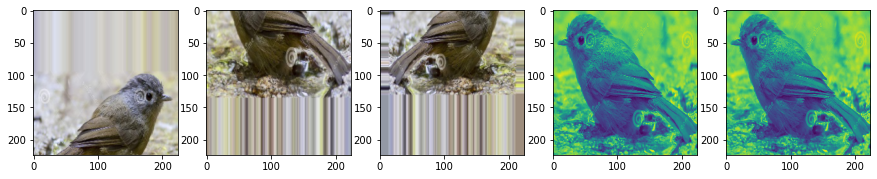

In [ ]:
'''Preprocessing voor TRAIN'''

import pandas as pd
from skimage import data
from skimage.color import rgb2gray
from skimage import io 
import skimage
import tensorflow 
import keras  
import os
import glob 
import matplotlib.image as mpimg
import random 
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline
from numpy import expand_dims
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator


#Create variables
data_train = []
labels_train = []


#df = pd.read_csv (r'/content/trainfiles.csv')
p=0
# for path in df["Path"]:
img = mpimg.imread('/content/drive/MyDrive/Image classifier/test/Dataset/train/ABBOTTS BABBLER/001.jpg')
#imgplot = plt.imshow(img)

fig, im = plt.subplots(nrows=1, ncols=5, figsize=(15,15))

'''Make the image gray, to reduce computation complexity'''
gray_image = skimage.color.rgb2gray(img)
gray_image = np.array(gray_image)
data_train = np.append(data_train, gray_image)
im[3].imshow(gray_image)
'''Normalize the image'''
norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
norm_image = np.array(norm_image)
data_train = np.append(data_train, norm_image)
# plt.imshow(norm_image)
im[4].imshow(norm_image)




'''Data augmentation. Changing the images to increase diversity without collecting new data.'''
data = img_to_array(img)

# expand dimension to one sample
samples = expand_dims(img, 0)

# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-90,90], horizontal_flip=True, zoom_range=0.2)

# create an iterator
it = datagen.flow(samples, batch_size=1)
# fig, im = plt.subplots(nrows=1, ncols=5, figsize=(15,15))


image = next(it)[0].astype('uint8')
im[0].imshow(image) 
image = next(it)[0].astype('uint8')
im[1].imshow(image) 
image = next(it)[0].astype('uint8')
im[2].imshow(image) 


print(data_train)

In [ ]:
'''Preprocessing for Train on GPU'''
import pandas as pd
from skimage import data
from skimage.color import rgb2gray
from skimage import io 
import skimage
import tensorflow 
import keras  
import os
import glob 
import matplotlib.image as mpimg
import random 
import numpy as np
import matplotlib.pyplot as plt  
from numpy import expand_dims
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator


#Create variables
data_train = []
labels_train = []


df = pd.read_csv (r'/home/u668954/Merged_train.csv')
p=0
for path in df["Path"]:
  img = mpimg.imread(path)
  fig, im = plt.subplots(nrows=1, ncols=5, figsize=(15,15))

  '''Make the image gray, to reduce computation complexity'''
  gray_image, gray_ID = skimage.color.rgb2gray(img), df["ID"].iloc[p]
  gray_image = np.array(gray_image)
  data_train = np.append(data_train, gray_image)
  labels_train.append(gray_ID)


  '''Normalize the image'''
  norm_image, norm_ID = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image)), df["ID"].iloc[p]
  norm_image = np.array(norm_image)
  data_train = np.append(data_train, norm_image)
  labels_train.append(norm_ID)
  
  '''You can show images'''
  # im[0].imshow(gray_image)
  # im[1].imshow(norm_image)



  '''Data augmentation. Changing the images to increase diversity without collecting new data.'''
  data = img_to_array(img)

  # expand dimension to one sample
  samples = expand_dims(img, 0)

  # create image data augmentation generator
  datagen = ImageDataGenerator(width_shift_range=[-90,90], horizontal_flip=True, zoom_range=0.2)

  # create an iterator
  it = datagen.flow(samples, batch_size=1)
  # fig, im = plt.subplots(nrows=1, ncols=5, figsize=(15,15))


  image = next(it)[0].astype('uint8')
  picture = np.array(image)
  data_train = np.append(data_train, picture)
  labels_train.append(df["ID"].iloc[p])
  # im[2].imshow(image) 


  image = next(it)[0].astype('uint8')
  picture = np.array(image)
  data_train = np.append(data_train, picture)
  labels_train.append(df["ID"].iloc[p])
  # im[3].imshow(image) 


  image = next(it)[0].astype('uint8')
  picture = np.array(image)
  data_train = np.append(data_train, picture)
  labels_train.append(df["ID"].iloc[p])
  # im[4].imshow(image) 

  p += 1



np.save("data_train.npy", data_train)
np.save("labels_train.npy", labels_train)

In [ ]:
'''Preprocessing for Testing on GPU'''
import pandas as pd
from skimage import data
from skimage.color import rgb2gray
from skimage import io 
import skimage
import tensorflow 
import keras  
import os
import glob 
import matplotlib.image as mpimg
import random 
import numpy as np
import matplotlib.pyplot as plt  
from numpy import expand_dims
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator


#Create variables
data_testing = []
labels_testing = []


df = pd.read_csv (r'/home/u668954/Merged_testing.csv')
p=0
for path in df["Path"]:
  img = mpimg.imread(path)
  fig, im = plt.subplots(nrows=1, ncols=5, figsize=(15,15))

  '''Make the image gray, to reduce computation complexity'''
  gray_image, gray_ID = skimage.color.rgb2gray(img), df["ID"].iloc[p]
  gray_image = np.array(gray_image)
  data_testing = np.append(data_testing, gray_image)
  labels_testing.append(gray_ID)


  '''Normalize the image'''
  norm_image, norm_ID = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image)), df["ID"].iloc[p]
  norm_image = np.array(norm_image)
  data_testing = np.append(data_testing, norm_image)
  labels_testing.append(norm_ID)
  
  '''You can show images'''
  # im[0].imshow(gray_image)
  # im[1].imshow(norm_image)



  '''Data augmentation. Changing the images to increase diversity without collecting new data.'''
  data = img_to_array(img)

  # expand dimension to one sample
  samples = expand_dims(img, 0)

  # create image data augmentation generator
  datagen = ImageDataGenerator(width_shift_range=[-90,90], horizontal_flip=True, zoom_range=0.2)

  # create an iterator
  it = datagen.flow(samples, batch_size=1)
  # fig, im = plt.subplots(nrows=1, ncols=5, figsize=(15,15))


  image = next(it)[0].astype('uint8')
  picture = np.array(image)
  data_testing = np.append(data_testing, picture)
  labels_testing.append(df["ID"].iloc[p])
  # im[2].imshow(image) 


  image = next(it)[0].astype('uint8')
  picture = np.array(image)
  data_testing = np.append(data_testing, picture)
  labels_testing.append(df["ID"].iloc[p])
  # im[3].imshow(image) 


  image = next(it)[0].astype('uint8')
  picture = np.array(image)
  data_testing = np.append(data_testing, picture)
  labels_testing.append(df["ID"].iloc[p])
  # im[4].imshow(image) 

  p += 1



np.save("data_testing.npy", data_testing)
np.save("labels_testing.npy", labels_testing)

In [ ]:
random_array = [5,6,8,7,2]
np.save("random_array.npy", random_array)


q = np.load("random_array.npy")
print(q)

[5 6 8 7 2]


In [ ]:
'''Preprocessing voor TEST'''


#Create variables
data_test = []
labels_test = []


df = pd.read_csv (r'/content/Testingfiles.csv')
p=0
for path in df["Path"]:
  img = mpimg.imread('/content/drive/MyDrive/Image classifier/test/Dataset/'+path)
  #imgplot = plt.imshow(img)

  '''Make the image gray, to reduce computation complexity'''
  gray_image,gray_ID = skimage.color.rgb2gray(img), df["ID"].iloc[p]
  #plt.imshow(gray_image, cmap = 'gray')
  '''Normalize the image'''
  norm_image, norm_ID = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image)), df["ID"].iloc[p]
  #plt.imshow(norm_image)



  '''Data augmentation. Changing the images to increase diversity without collecting new data.'''
  data = img_to_array(img)

  # expand dimension to one sample
  samples = expand_dims(img, 0)

  # create image data augmentation generator
  datagen = ImageDataGenerator(width_shift_range=[-100,100])

  # create an iterator
  it = datagen.flow(samples, batch_size=1)
  fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

  # generate batch of images
  for i in range(3):

    # convert to unsigned integers
    image = next(it)[0].astype('uint8')
 
    # plot image
    #im[i].imshow(image) 
    picture = im[i]
    picture = np.array(picture)
    data_test = np.append(data_test, picture)
    labels_test.append(df["ID"].iloc[p])

  data_test = np.append(data_test, img)
  labels_test.append(df["ID"].iloc[p])
  data_test = np.append(data_test, norm_image)
  labels_test.append(df["ID"].iloc[p])
  data_test = np.append(data_test, gray_image)
  labels_test.append(df["ID"].iloc[p])

  print(labels_test)
  print(data_test)
  





  '''Get the different colors'''
  # i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
  # i.set_figwidth(20) 

  # im1.imshow(img)  #Original image
  # im2.imshow(img[:, : , 0]) #Red
  # im3.imshow(img[:, : , 1]) #Green
  # im4.imshow(img[:, : , 2]) #Blue
  # #plt.show()
  # i.suptitle('Original & RGB image channels')


  # labels = (df["Bird name"].loc[[p]])
  # labels = labels.to_string(index=False, header=False)
  # print(path, labels)
  p += 1


np.save("data_test.npy", data_test)
np.save("labels_test.npy", labels_test)

In [ ]:
'''MODEL'''
data_train = np.load("data_train.npy")
data_test = np.load("data_test.npy")
labels_train = np.load("labels_train.npy")
labels_test = np.load("labels_test.npy")

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
epochs = 15
history = model.fit(data_train, labels_train, epochs=epochs, batch_size=64, validation_data=(data_test, labels_test))

NameError: ignored

In [ ]:
'''Create the model'''
model.save('Image_classifier.h5')

NameError: ignored

In [ ]:
''''Validate the model'''
model = load_model('Image_classifier.h5')
data_validation = np.load("data_validation.npy")
labels_validation = np.load("labels_validation.npy")

predictions = model.predict_classes(data_validation)
print("accuracy: ", accuracy_score(labels_validation, predictions))

In [ ]:
'''Build model'''
from tkinter import filedialog
from tkinter import *
import tkinter as tk
from PIL import ImageTk, Image
from keras.models import load_model
import numpy as np
#load the trained model to classify traffic signs
model = load_model('Image_classifier.h5')
#dictionary to label all traffic signs class.

#Create dict for all bird names and give it a value
classes = {}
name_list = []
i=0
for name in df["Bird name"]:
  if name not in name_list:
    name_list.append(name)
    classes[name] = i
    i+=1


#initialize GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Bird image classifier')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign)
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

OSError: ignored

In [ ]:
  #Code for images
  img = mpimg.imread('/content/drive/MyDrive/Image classifier/test/Dataset/train/ABBOTTS BABBLER/001.jpg')
  imgplot = plt.imshow(img)


  i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
  i.set_figwidth(20) 

  im1.imshow(img)  #Original image
  im2.imshow(img[:, : , 0]) #Red
  im3.imshow(img[:, : , 1]) #Green
  im4.imshow(img[:, : , 2]) #Blue
  plt.show()

NameError: ignored

SyntaxError: ignored

In [ ]:
'''Create the files needed for Insect images'''


import os

dataframe = {"Animal name": [], "Path": [], "ID": []}
dataframe = pd.DataFrame(dataframe)

ID = 450
p = 0
directory = '/content/drive/MyDrive/Image classifier Insects/database/'
for foldername in os.listdir(directory):
    f = os.path.join("Insect_classifier/database/", foldername)

    name = f.replace("/content/drive/MyDrive/Image classifier Insects/database/", "")
    ID_str = str(ID)
    new_row = {"Animal name":name , "Path":f, "ID":ID_str}
    dataframe = dataframe.append(new_row, ignore_index=True)
    p += 1
    ID += 1

dataframe.to_csv("Insects.csv", index=False)


insectinfo = {"Animal name": [], "Path": [], "ID": []}
insectinfo = pd.DataFrame(insectinfo)

i= -1
for folder in dataframe["Path"]:
  i += 1
  for file in os.listdir(folder):
    insectname = (dataframe['Animal name'].loc[[i]])
    insectname = insectname.to_string(index=False, header=False)

    insectid = (dataframe['ID'].loc[[i]])
    insectid = insectid.to_string(index=False, header=False)



    new_row = {"Animal name":insectname, "Path":folder+"/"+file, "ID":insectid}
    insectinfo = insectinfo.append(new_row, ignore_index=True)
  
insectinfo.to_csv("Full insects.csv", index = False)
  

# labels = (df["labels"].loc[[p]])
# labels = labels.to_string(index=False, header=False)
# class_ID = (df["class id"].loc[[p]])
# class_ID = class_ID.to_string(index=False, header=False)
# new_row = {"Bird name":labels , "Path":i, "ID":class_ID}
# dataframe = dataframe.append(new_row, ignore_index=True)


FileNotFoundError: ignored

In [ ]:
'''Train test split'''
from sklearn.model_selection import train_test_split

insectinfo = pd.read_csv (r'/content/Full insects.csv')


train, validation = train_test_split(insectinfo, test_size = 0.2, stratify=insectinfo["ID"])
validation, test = train_test_split(validation, test_size = 0.5, stratify=validation["ID"])


train.to_csv("insects train.csv", index = False)
validation.to_csv("insects validation.csv", index = False)
test.to_csv("insects test.csv", index = False)

In [ ]:
insect_trained = pd.read_csv (r'/content/insects train.csv')
bird = pd.read_csv(r'/content/Testingfiles.csv')

frames = [bird, insect_trained]

final = pd.concat(frames)
final.to_csv("Merged test.csv", index = False)